In [1]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
boston_data = datasets.load_boston()

In [3]:
# def sk_dataset_to_df(data):
#    return pd.DataFrame(data.data, columns=data.feature_names)
# boston = sk_dataset_to_df(boston_data) -- the MEDV column is missing

# http://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [4]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(r'../input_data/Boston_housing/housing.data', names=columns, sep='\s+|\t+', engine='python')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
X = boston.drop('MEDV', axis=1)

y = boston['MEDV'].values.reshape(-1, 1)

X_rooms = boston['RM'].values.reshape(-1, 1)

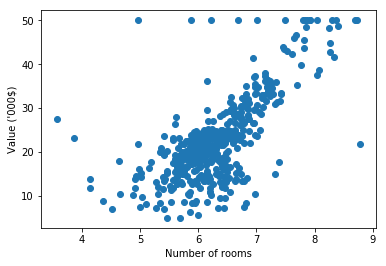

In [6]:
plt.xlabel('Number of rooms')
plt.ylabel("Value ('000$)")
plt.scatter(X_rooms, y)
plt.show()

Linear regression is for minimizing the residual for ax+b

In [7]:
linear_reg = linear_model.LinearRegression()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size = 0.3, random_state=13)

In [9]:
# Fit the model to the data
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# R^2  score on test data
print(linear_reg.score(X_test, y_test))

0.508720722955


In [11]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
y_pred = linear_reg.predict(prediction_space)

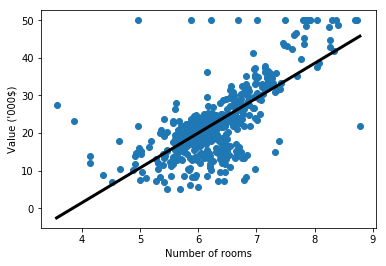

In [12]:
# Plot regression line
plt.xlabel('Number of rooms')
plt.ylabel("Value ('000$)")
plt.scatter(X_rooms, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = linear_reg.predict(X_test)
print("R^2: {}".format(linear_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5087207229554374
Root Mean Squared Error: 6.3702932428805195


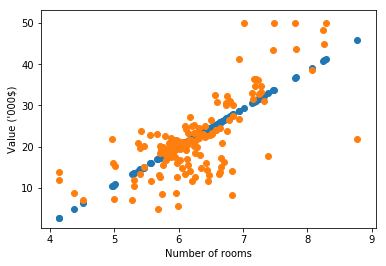

In [14]:
plt.xlabel('Number of rooms')
plt.ylabel("Value ('000$)")

plt.scatter(X_test, y_pred)
plt.scatter(X_test, y_test)
# plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [15]:
cv_scores = cross_val_score(linear_reg, X_rooms, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: -0.029521919957810682


In [16]:
for i in [3, 5, 10, 15]:
    print('{}-Fold CV computation'.format(i))
    %timeit cross_val_score(linear_reg, X_rooms, y, cv=i)

3-Fold CV computation
2.35 ms ± 264 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5-Fold CV computation
3.46 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10-Fold CV computation
6.58 ms ± 38.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15-Fold CV computation
10 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso = Lasso(alpha=0.2, normalize=True)
lasso.fit(X, y)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

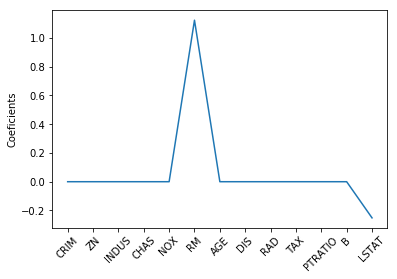

In [19]:
plt.plot(range(len(X.columns)), lasso.coef_)
plt.xticks(range(len(X.columns)), X.columns, rotation=45);
plt.xlabel('')
plt.ylabel('Coeficients')
plt.show()

In [20]:
from sklearn.linear_model import Ridge

In [21]:
def display_cv_plot(cv_scores, cv_scores_std, cv_ways):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(cv_ways)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [22]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge_reg = Ridge(normalize=True)

for alpha in alpha_space:
    ridge_reg.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge_reg, X, y, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

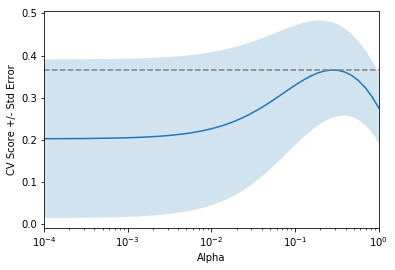

In [23]:
display_cv_plot(ridge_scores, ridge_scores_std, 10)
